In [3]:
#import necessary libraries for data cleaning and visualization

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('dark_background')

In [4]:
df = pd.read_csv(r'electronics.csv')
df.head(20)  #go through the datset briefly

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
5,0,5,2.0,1999-07-12,Female,Portable Audio & Video,NaN,1999,NaN,0
6,0,6,5.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
7,0,7,2.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
8,0,8,4.0,1999-07-16,Female,Portable Audio & Video,NaN,1999,NaN,0
9,0,9,5.0,1999-08-20,Female,Portable Audio & Video,NaN,1999,NaN,0


In [5]:
df.sample(n=10)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1174834,5405,1053072,5.0,2017-09-29,Female,Computers & Accessories,Apple,2014,NaN,0
955594,511,524055,4.0,2016-09-28,Female&Male,Home Audio,Sony,2007,Male,2
354338,390,329051,5.0,2014-10-30,Male,Camera & Photo,NaN,2007,NaN,0
1182155,9250,1059493,4.0,2017-10-18,Female,Accessories & Supplies,NaN,2016,Male,0
630689,7453,574765,5.0,2015-10-01,Female,Headphones,NaN,2015,Female,0
130181,927,123503,3.0,2013-02-18,Female,Accessories & Supplies,EldHus,2009,NaN,0
838111,3442,756896,4.0,2016-05-03,Female,Accessories & Supplies,NaN,2013,NaN,0
795411,6979,719446,5.0,2016-03-14,Male,Headphones,NaN,2015,NaN,0
411268,2636,379817,5.0,2015-01-14,Female,Computers & Accessories,NaN,2012,NaN,0
352358,3029,327321,5.0,2014-10-27,Female&Male,Headphones,Bose,2013,NaN,0


In [6]:
#metadata of the dataset
print (df.shape)
print(df.info())

(1292954, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB
None


In [7]:
'''
timestamp has dtype as object
change the datatypes to appropriate datatypes 

'year' has dtype as int64, we can change the dtype for this column as well, 
however, as we're just dealing with year and not months and days, we can let it be as it is
'''
from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format ="%Y-%m-%d")

print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   item_id     1292954 non-null  int64         
 1   user_id     1292954 non-null  int64         
 2   rating      1292954 non-null  float64       
 3   timestamp   1292954 non-null  datetime64[ns]
 4   model_attr  1292954 non-null  object        
 5   category    1292954 non-null  object        
 6   brand       331120 non-null   object        
 7   year        1292954 non-null  int64         
 8   user_attr   174124 non-null   object        
 9   split       1292954 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 98.6+ MB
None


In [8]:
#some columns have datatype as object, but they are simply strings
#so we change dtype to string

cols = df.columns.tolist()
for col in cols:
    if df[col].dtype == object:
        df[col] = df[col].astype("string")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   item_id     1292954 non-null  int64         
 1   user_id     1292954 non-null  int64         
 2   rating      1292954 non-null  float64       
 3   timestamp   1292954 non-null  datetime64[ns]
 4   model_attr  1292954 non-null  string        
 5   category    1292954 non-null  string        
 6   brand       331120 non-null   string        
 7   year        1292954 non-null  int64         
 8   user_attr   174124 non-null   string        
 9   split       1292954 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), string(4)
memory usage: 98.6 MB
None


In [9]:
df.describe()

,item_id,user_id,rating,timestamp,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1292954,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2015-06-18 11:30:34.851355904,2.012938e+03,1.747587e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1999-06-13 00:00:00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2014-09-06 00:00:00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2015-10-19 00:00:00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2016-10-19 00:00:00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2018-10-01 00:00:00,2.018000e+03,2.000000e+00
std,2.525346e+03,3.342374e+05,1.379732e+00,NaN,2.643513e+00,5.506810e-01


In [10]:
df.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              50
year               20
user_attr           2
split               3
dtype: int64

In [11]:
#check whether duplicate records are present or not
print (df.duplicated().sum())

0


In [12]:
#check how many null records are present
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [13]:
#copy the dataframe into a new variable to perform data cleaning
data = df.copy()
print(data)

         item_id  user_id  rating  timestamp model_attr  \
0              0        0     5.0 1999-06-13     Female   
1              0        1     5.0 1999-06-14     Female   
2              0        2     3.0 1999-06-17     Female   
3              0        3     1.0 1999-07-01     Female   
4              0        4     2.0 1999-07-06     Female   
...          ...      ...     ...        ...        ...   
1292949     9478  1157628     1.0 2018-09-26     Female   
1292950     9435  1157629     5.0 2018-09-26     Female   
1292951     9305  1157630     3.0 2018-09-26     Female   
1292952     9303  1157631     5.0 2018-09-29       Male   
1292953     9478  1157632     1.0 2018-10-01     Female   

                        category       brand  year user_attr  split  
0         Portable Audio & Video        <NA>  1999      <NA>      0  
1         Portable Audio & Video        <NA>  1999      <NA>      0  
2         Portable Audio & Video        <NA>  1999      <NA>      0  
3         P

In [14]:
#columns that have null value in the 'brand' columns do not provide us a clear picture for sales analysis
#for this particular project, we simply drop them 
#however, there are strategies that can be used to extract information from them as well

data.dropna(inplace = True)
data.drop_duplicates(inplace=True)
data.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64

In [15]:
#reset the index of the dataframe to establish continuity
data.reset_index(drop = True, inplace = True)

In [16]:
print (data)

       item_id  user_id  rating  timestamp   model_attr        category  \
0            7      131     4.0 2000-06-15       Female      Home Audio   
1           19      231     5.0 2000-12-31       Female  Camera & Photo   
2           14      233     5.0 2001-01-02  Female&Male  Camera & Photo   
3           14      257     5.0 2001-02-04  Female&Male  Camera & Photo   
4           14      269     5.0 2001-03-02  Female&Male  Camera & Photo   
...        ...      ...     ...        ...          ...             ...   
45161     7828  1157458     5.0 2018-08-29  Female&Male      Headphones   
45162     8624  1157504     5.0 2018-08-30       Female      Headphones   
45163     9513  1157527     5.0 2018-09-01         Male      Headphones   
45164     9125  1157555     3.0 2018-09-05       Female      Headphones   
45165     9478  1157632     1.0 2018-10-01       Female      Headphones   

            brand  year user_attr  split  
0         Philips  2001      Male      0  
1           C

In [17]:
print(data.sample(30))

       item_id  user_id  rating  timestamp   model_attr  \
13445     3625   309559     5.0 2014-09-22       Female   
12835       17   295658     4.0 2014-08-26       Female   
1243       901    20275     4.0 2009-01-18       Female   
27373     7828   652569     5.0 2016-01-03  Female&Male   
37161     6726   914946     5.0 2016-12-29  Female&Male   
1675      1040    33663     1.0 2009-11-23       Female   
22416     6562   521564     5.0 2015-07-29  Female&Male   
39326     8375   976176     1.0 2017-04-04       Female   
6497      1575   143849     5.0 2013-05-20         Male   
34609     8954   845805     5.0 2016-09-07       Female   
12561     4576   289576     5.0 2014-08-14  Female&Male   
12773     2569   294019     5.0 2014-08-23  Female&Male   
21885     2979   507979     1.0 2015-07-13       Female   
19004     5812   436605     5.0 2015-03-31         Male   
23208     5405   542405     5.0 2015-08-22       Female   
25349     1124   599776     5.0 2015-11-01         Male 

In [18]:
#list all the brands that we have in the dataset
brand_list = data['brand'].unique()
print('No. of brands: ', len(brand_list),'\n')
print('Brands: ',brand_list)


No. of brands:  50 

Brands:  <StringArray>
[     'Philips',        'Canon',        'Kodak',        'Nikon',
           'HP',         'Sony',     'Fujifilm',      'Olympus',
          'JVC',      'Linksys',      'Toshiba',   'Kensington',
      'Vivitar',    'Panasonic',     'Polaroid',        'Apple',
       'EldHus',         'Bose',   'Sennheiser',        'Jabra',
       'Garmin',       'Archos',     'Logitech',       'Savage',
    'ViewSonic',   'Etre Jeune',      'Samsung',         'Pyle',
    'Gary Fong',       'Uniden',        'ebasy',      'Generic',
         'JLAB',       'Neewer',        'iRULU',   'Skullcandy',
       'Tiamat',   'TaoTronics',   'DURAGADGET',       'Fintie',
      'DBPOWER',   'Koolertron',        'Plemo', 'Cooper Cases',
          'LSS',         'Mpow',        'IRULU',       'EINCAR',
     'XShields',       'Funlux']
Length: 50, dtype: string


In [19]:
#list all the categories in the dataset
category = data['category'].unique()
print('No. of categories: ', len(category),'\n')
print('Categories: ', category)

No. of categories:  10 

Categories:  <StringArray>
[             'Home Audio',          'Camera & Photo',
 'Computers & Accessories',      'Television & Video',
              'Headphones',  'Portable Audio & Video',
   'Car Electronics & GPS',  'Accessories & Supplies',
 'Security & Surveillance',     'Wearable Technology']
Length: 10, dtype: string


Text(0.03, 0.99, 'Total products sold: 1,292,954')

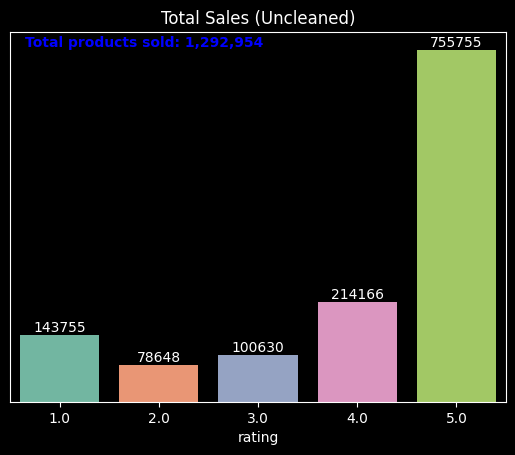

In [20]:
ax = sns.countplot(x='rating', data=df, hue='rating', legend=False, palette="Set2")
ax.set_title("Total Sales (Uncleaned)")
ax.yaxis.set_visible(False)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

total_sales = df['rating'].count()
ax.text(
    0.03, 0.99,
    f"Total products sold: {total_sales:,}",
    ha='left', va='top',
    transform=ax.transAxes,
    fontsize=10, fontweight='bold', color='blue'
)


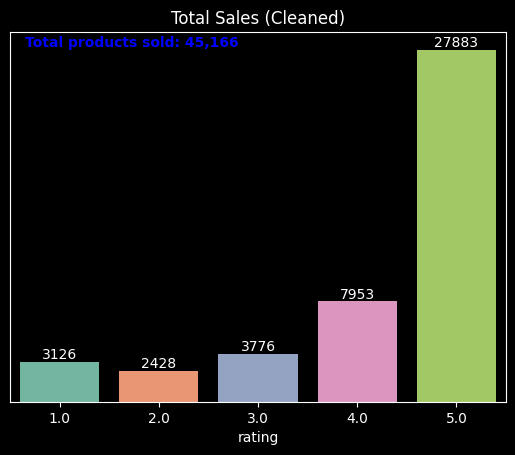

In [21]:
ax_clean = sns.countplot(data = data, x = 'rating', hue = 'rating', legend = False, palette = 'Set2')

#using a countplot because we are counting the number of 'ratings' and not summing them up
ax_clean.set_title('Total Sales (Cleaned)')
ax_clean.yaxis.set_visible(False)

for container in ax_clean.containers:
    ax_clean.bar_label(container, label_type='edge')

total_sales_new = data['rating'].count()
ax_clean.text(
    0.03, 0.99,
    f"Total products sold: {total_sales_new:,}",
    ha='left', va='top',
    transform=ax_clean.transAxes,
    fontsize=10, fontweight='bold', color='blue'
)

plt.show()


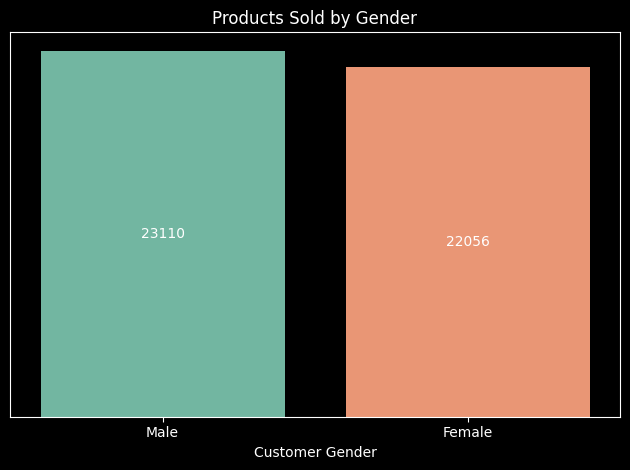

In [22]:
ax = sns.countplot(data = data, x = 'user_attr', hue = 'user_attr', palette = 'Set2')
ax.yaxis.set_visible(False)
ax.set_xlabel('Customer Gender')
ax.set_title("Products Sold by Gender")
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

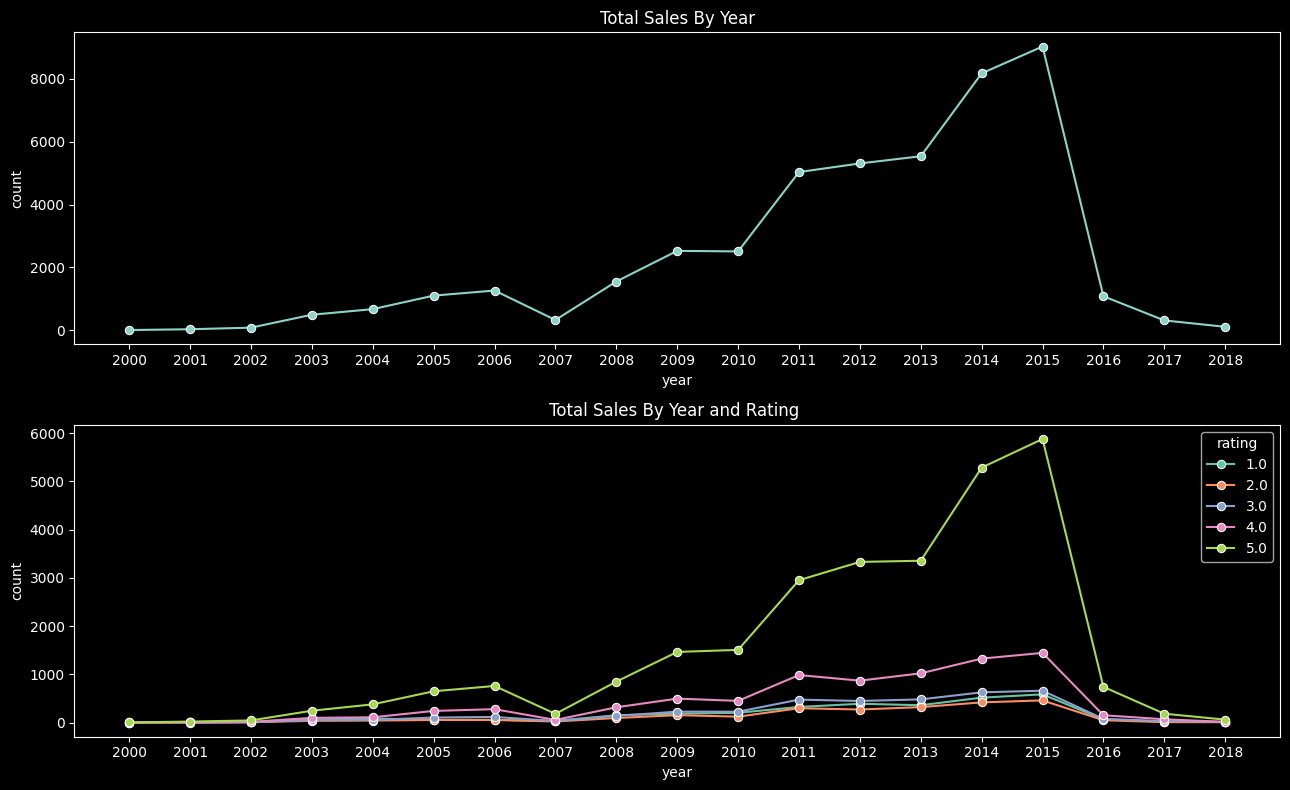

In [31]:
sales = data.groupby(['year','rating']).agg(count=('rating', 'count')).reset_index()

#use the new sales dataframe created for grouping
total = sales.groupby('year')['count'].sum().reset_index()
years = sales['year'].unique()
fig, axs = plt.subplots(2, 1, figsize=(13, 8))

#build a chart for total sales by year
ax_total = sns.lineplot(data = total, x = 'year', y = 'count', marker = 'o', ax = axs[0])
axs[0].set_xticks(years)
axs[0].set_title("Total Sales By Year")

ax_sales = sns.lineplot(data = sales, x = 'year', y = 'count', hue = 'rating', palette = 'Set2', marker = 'o', ax = axs[1])
axs[1].set_xticks(years)
axs[1].set_title("Total Sales By Year and Rating ")

plt.tight_layout()
plt.show()

<Figure size 1000x700 with 0 Axes>

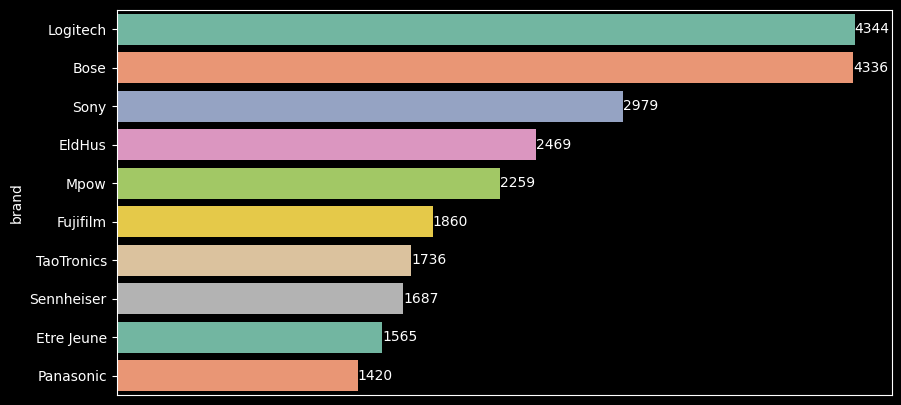

<Figure size 1000x700 with 0 Axes>

In [24]:
brand_counts = data.groupby('brand')['rating'].count().sort_values(ascending = False).head(10).reset_index()
brand_counts.rename(
    columns = {
        'rating' : 'count'
    },
    inplace = True)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = brand_counts, y = 'brand', x ='count', hue = 'brand', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, label_type= 'edge')
ax.xaxis.set_visible(False)
plt.figure(figsize=(10,7))

<Figure size 1200x800 with 0 Axes>

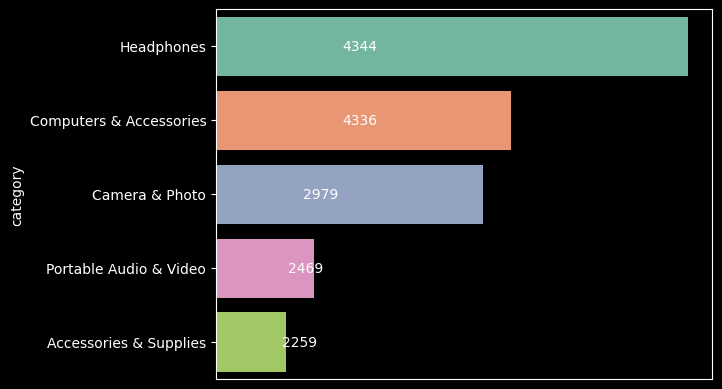

<Figure size 1200x800 with 0 Axes>

In [25]:
cat_sales_count = data.groupby('category').agg(count = ('rating', 'count')).sort_values('count', ascending = False).head(5).reset_index()
axN = sns.barplot(data = cat_sales_count, x = 'count', y = 'category', hue = 'category', palette='Set2')

for container in ax.containers:
    axN.bar_label(container, label_type='edge')

axN.xaxis.set_visible(False)
plt.figure(figsize=(12,8))

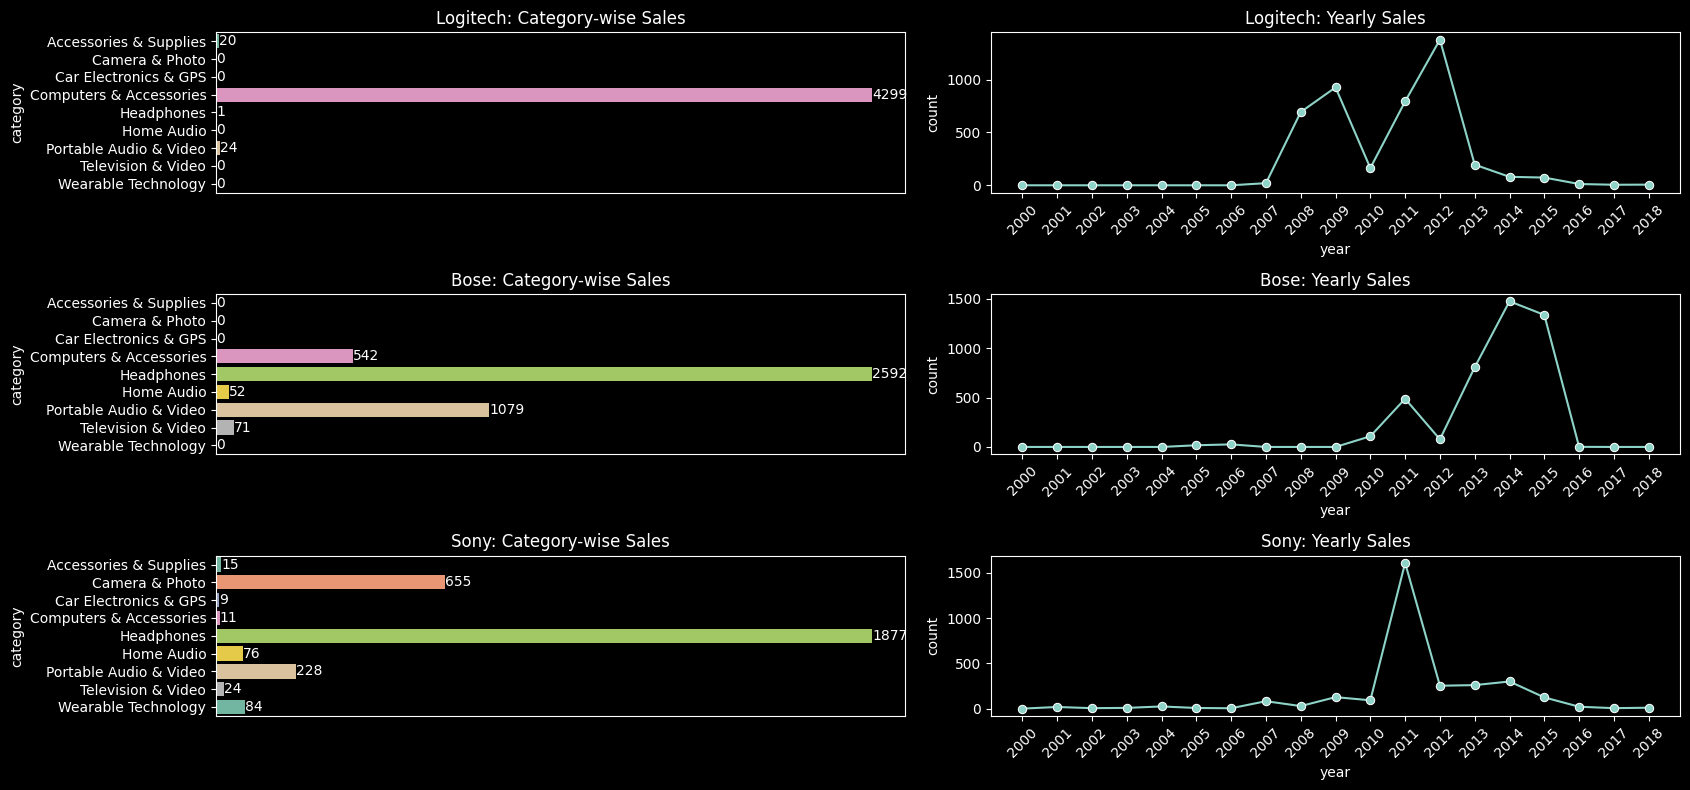

In [ ]:
brands = brand_counts['brand'][:3]

brand_data = data[data['brand'].isin(brands)]
brand_data.reset_index(drop = True, inplace = True)
brand_data = brand_data.groupby(['brand', 'category','year']).agg(count = ('rating', 'count')) #multi-index dataframe

#print(brand_data)
'''
brand -> category -> year -> rating (count)
'''
years = data['year'].sort_values().unique()
brand_lists = brand_data.index.get_level_values('brand').unique()
categories = brand_data.index.get_level_values('category').unique()

full_index = pd.MultiIndex.from_product(
    [brand_lists, categories, years],
    names = ['brand', 'category', 'year']
)

brand_data = brand_data.reindex(full_index, fill_value=0).reset_index()

# with this df, we can build visualiations for products sold by categories,
# and by year to understand which is the most selling category
# for each company and which year was a good business year for them

fig, axs = plt.subplots(3, 2, figsize=(17, 8))

for i, brand in enumerate(brands):
    new_df = brand_data[brand_data['brand'] == brand]
    yearly_sales = new_df.groupby('year')['count'].sum().reset_index()
    cat_sales = new_df.groupby('category')['count'].sum().reset_index()

    fig_1= sns.barplot(data = cat_sales, x = 'count', y = 'category', hue = 'category', palette ='Set2', ax = axs[i, 0])
    axs[i, 0].set_title(f"{brand}: Category-wise Sales")
    axs[i, 0].xaxis.set_visible(False)
    for container in axs[i, 0].containers:
        axs[i, 0].bar_label(container, label_type= 'edge')

    fig_2 = sns.lineplot(data = yearly_sales, x = 'year', y = 'count', marker = 'o', ax = axs[i, 1])
    axs[i, 1].set_title(f"{brand}: Yearly Sales")
    axs[i, 1].set_xticks(years)           
    axs[i, 1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()